<a href="https://colab.research.google.com/github/nchadburn/Stat598-FinalProject/blob/main/MLPA%20PCA%2C%20Lasso%2C%20Ridge-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# finanance data
import yfinance as yf

#visualization
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import seaborn as sns

#date manipulation
from datetime import datetime
import pandas as pd
import numpy as np

#Autoreg and Arima models
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor


# statstical testing, plotting and decompositions
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

from scipy import stats

from sklearn.covariance import GraphicalLasso
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import GraphicalLasso
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [4]:
start_date = '2020-06-01'
end_date = '2023-12-01'
etf_ticker = 'MLPA'
moving_average_list = []
etf_tickers_url = "https://raw.githubusercontent.com/Aditya-Patel/Stat598-FinalProject/main/mlpa_full-holdings.csv"
crude_oil_stock_url = "https://raw.githubusercontent.com/Aditya-Patel/Stat598-FinalProject/main/crude%20oil%20spot%20price.csv"



https://www.eia.gov/dnav/pet/pet_pri_spt_s1_d.htm
pulled crude price oil from this


In [5]:
df_holdings = pd.read_csv(etf_tickers_url)
df_holdings = df_holdings[(df_holdings['Name'] != 'OTHER PAYABLE & RECEIVABLES') & (df_holdings['Name'] != 'CASH')]

df_holdings[f'Market Value ($)'] = df_holdings[f'Market Value ($)'].str.replace(',', '').astype(float)
total_market_value = df_holdings[f'Market Value ($)'].sum()
df_holdings['Percentage Holdings By Value'] = (df_holdings[f'Market Value ($)'] / total_market_value)
df_holdings

<ipython-input-5-4ce7dcf3f780>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holdings[f'Market Value ($)'] = df_holdings[f'Market Value ($)'].str.replace(',', '').astype(float)
<ipython-input-5-4ce7dcf3f780>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holdings['Percentage Holdings By Value'] = (df_holdings[f'Market Value ($)'] / total_market_value)


,% of Net Assets,Ticker,Name,SEDOL,Market Price ($),Shares Held,Market Value ($),Percentage Holdings By Value
0,20.87,ET,ENERGY TRANSFER LP,B0WHXD2,13.33,"22,735,436.84",3.030634e+08,2.004323e-01
1,13.76,EPD,ENTERPRISE PRODU,2285388,26.25,"7,611,951.00",1.998137e+08,1.321477e-01
2,12.17,MPLX,MPLX LP,B847R56,35.87,"4,925,004.00",1.766599e+08,1.168348e-01
3,10.80,PAA,PLAINS ALL AMER,2311960,14.95,"10,486,658.00",1.567755e+08,1.036842e-01
4,10.32,WES,WESTERN MIDSTREA,BJ552C8,28.24,"5,303,028.00",1.497575e+08,9.904279e-02
5,9.47,ENLC,ENLINK MIDSTREAM LLC,BJTNDQ9,12.81,"10,731,120.00",1.374656e+08,9.091352e-02
6,8.26,CQP,CHENIERE ENERGY,B1VNH36,59.30,"2,023,409.00",1.199882e+08,7.935470e-02
7,6.53,NS,NUSTAR ENERGY LP,2738804,19.00,"4,991,913.00",9.484635e+07,6.272705e-02
8,5.91,HESM,HESS MIDSTREAM-A,BKPK695,30.70,"2,795,220.00",8.581325e+07,5.675298e-02
9,4.53,GEL,GENESIS ENERGY L.P.,2372257,12.32,"5,334,251.00",6.571797e+07,4.346287e-02


In [6]:
df_crude_price = pd.read_csv(crude_oil_stock_url,usecols=[0, 1])

df_crude_price['Date'] = pd.to_datetime(df_crude_price['Date'], format='%b %d, %Y')
df_crude_price.set_index('Date', inplace=True)
df_crude_price.rename(columns={'WTI Barrell Spot Price':'Spot Price'}, inplace=True)

df_crude_price['Spot Price'] = df_crude_price['Spot Price'].fillna(method='ffill')



In [7]:

all_stocks_data = yf.download(etf_ticker, start=start_date, end=end_date)
#join spot price and etf
all_stocks_data['Ticker'] = etf_ticker
all_stocks_data.columns = [f'{etf_ticker}_{col}' if col not in ['Ticker', 'Date'] else col for col in all_stocks_data.columns]
all_stocks_data = all_stocks_data.join(df_crude_price, how='left')




[*********************100%%**********************]  1 of 1 completed


In [8]:
all_stocks_data

,MLPA_Open,MLPA_High,MLPA_Low,MLPA_Close,MLPA_Adj Close,MLPA_Volume,Ticker,Spot Price
Date,,,,,,,,
2020-06-01,29.770000,30.030001,29.270000,29.459999,21.973850,251400,MLPA,35.49
2020-06-02,29.790001,30.209999,29.570000,30.150000,22.488514,384200,MLPA,36.88
2020-06-03,30.280001,31.430000,30.280001,31.190001,23.264238,596100,MLPA,37.33
2020-06-04,30.940001,31.969999,30.900000,31.940001,23.823652,508200,MLPA,37.42
2020-06-05,32.910000,33.910000,32.910000,33.560001,25.031994,510700,MLPA,39.49
...,...,...,...,...,...,...,...,...
2023-11-24,45.310001,45.450001,45.029999,45.200001,45.200001,32500,MLPA,74.83
2023-11-27,45.250000,45.330002,45.009998,45.250000,45.250000,48900,MLPA,74.46
2023-11-28,45.250000,45.259998,44.799999,45.250000,45.250000,91800,MLPA,76.09


In [9]:
# load all tickers part of that etf
for ticker in df_holdings['Ticker']:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    percentage_holding = df_holdings.loc[df_holdings['Ticker'] == ticker, 'Percentage Holdings By Value'].iloc[0]
    all_stocks_data[f'{ticker}_Percent_Holding'] = percentage_holding
    stock_data.columns = [f'{ticker}_{col}' if col != 'Ticker' else col for col in stock_data.columns]

    all_stocks_data = all_stocks_data.join(stock_data, how='outer')

all_stocks_data.fillna(0, inplace=True)


sum_values = pd.Series(0, index=all_stocks_data.index)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [27]:
#graphical lasso

all_stocks_data[f'{etf_ticker}_Next_Close'] = all_stocks_data[f'{etf_ticker}_Close'].shift(-1)
all_stocks_data = all_stocks_data.drop(all_stocks_data.index[-1])
close_values = all_stocks_data[[col for col in all_stocks_data.columns if '_Close' in col or col == 'Spot Price' or col == f'{etf_ticker}_Next_Close']]

print(close_values.columns)



Index(['MLPA_Close', 'Spot Price', 'ET_Close', 'EPD_Close', 'MPLX_Close',
       'PAA_Close', 'WES_Close', 'ENLC_Close', 'CQP_Close', 'NS_Close',
       'HESM_Close', 'GEL_Close', 'DKL_Close', 'PSX_Close', 'MLPX_Close',
       'CAPL_Close', 'SMLP_Close', 'GPP_Close', 'NGL_Close', 'MMLP_Close',
       'SNMP_Close', 'USDP_Close', 'MLPA_Next_Close'],
      dtype='object')


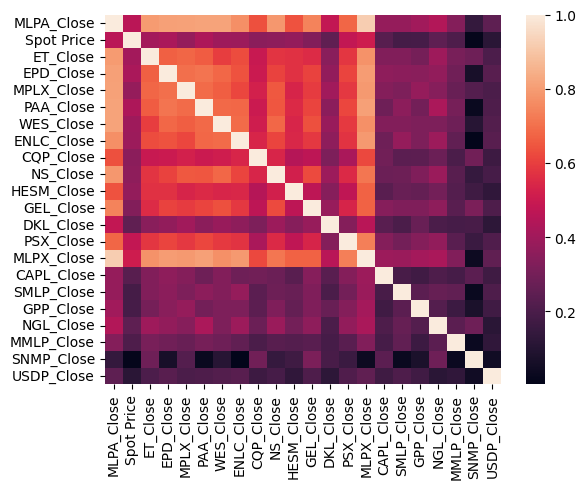

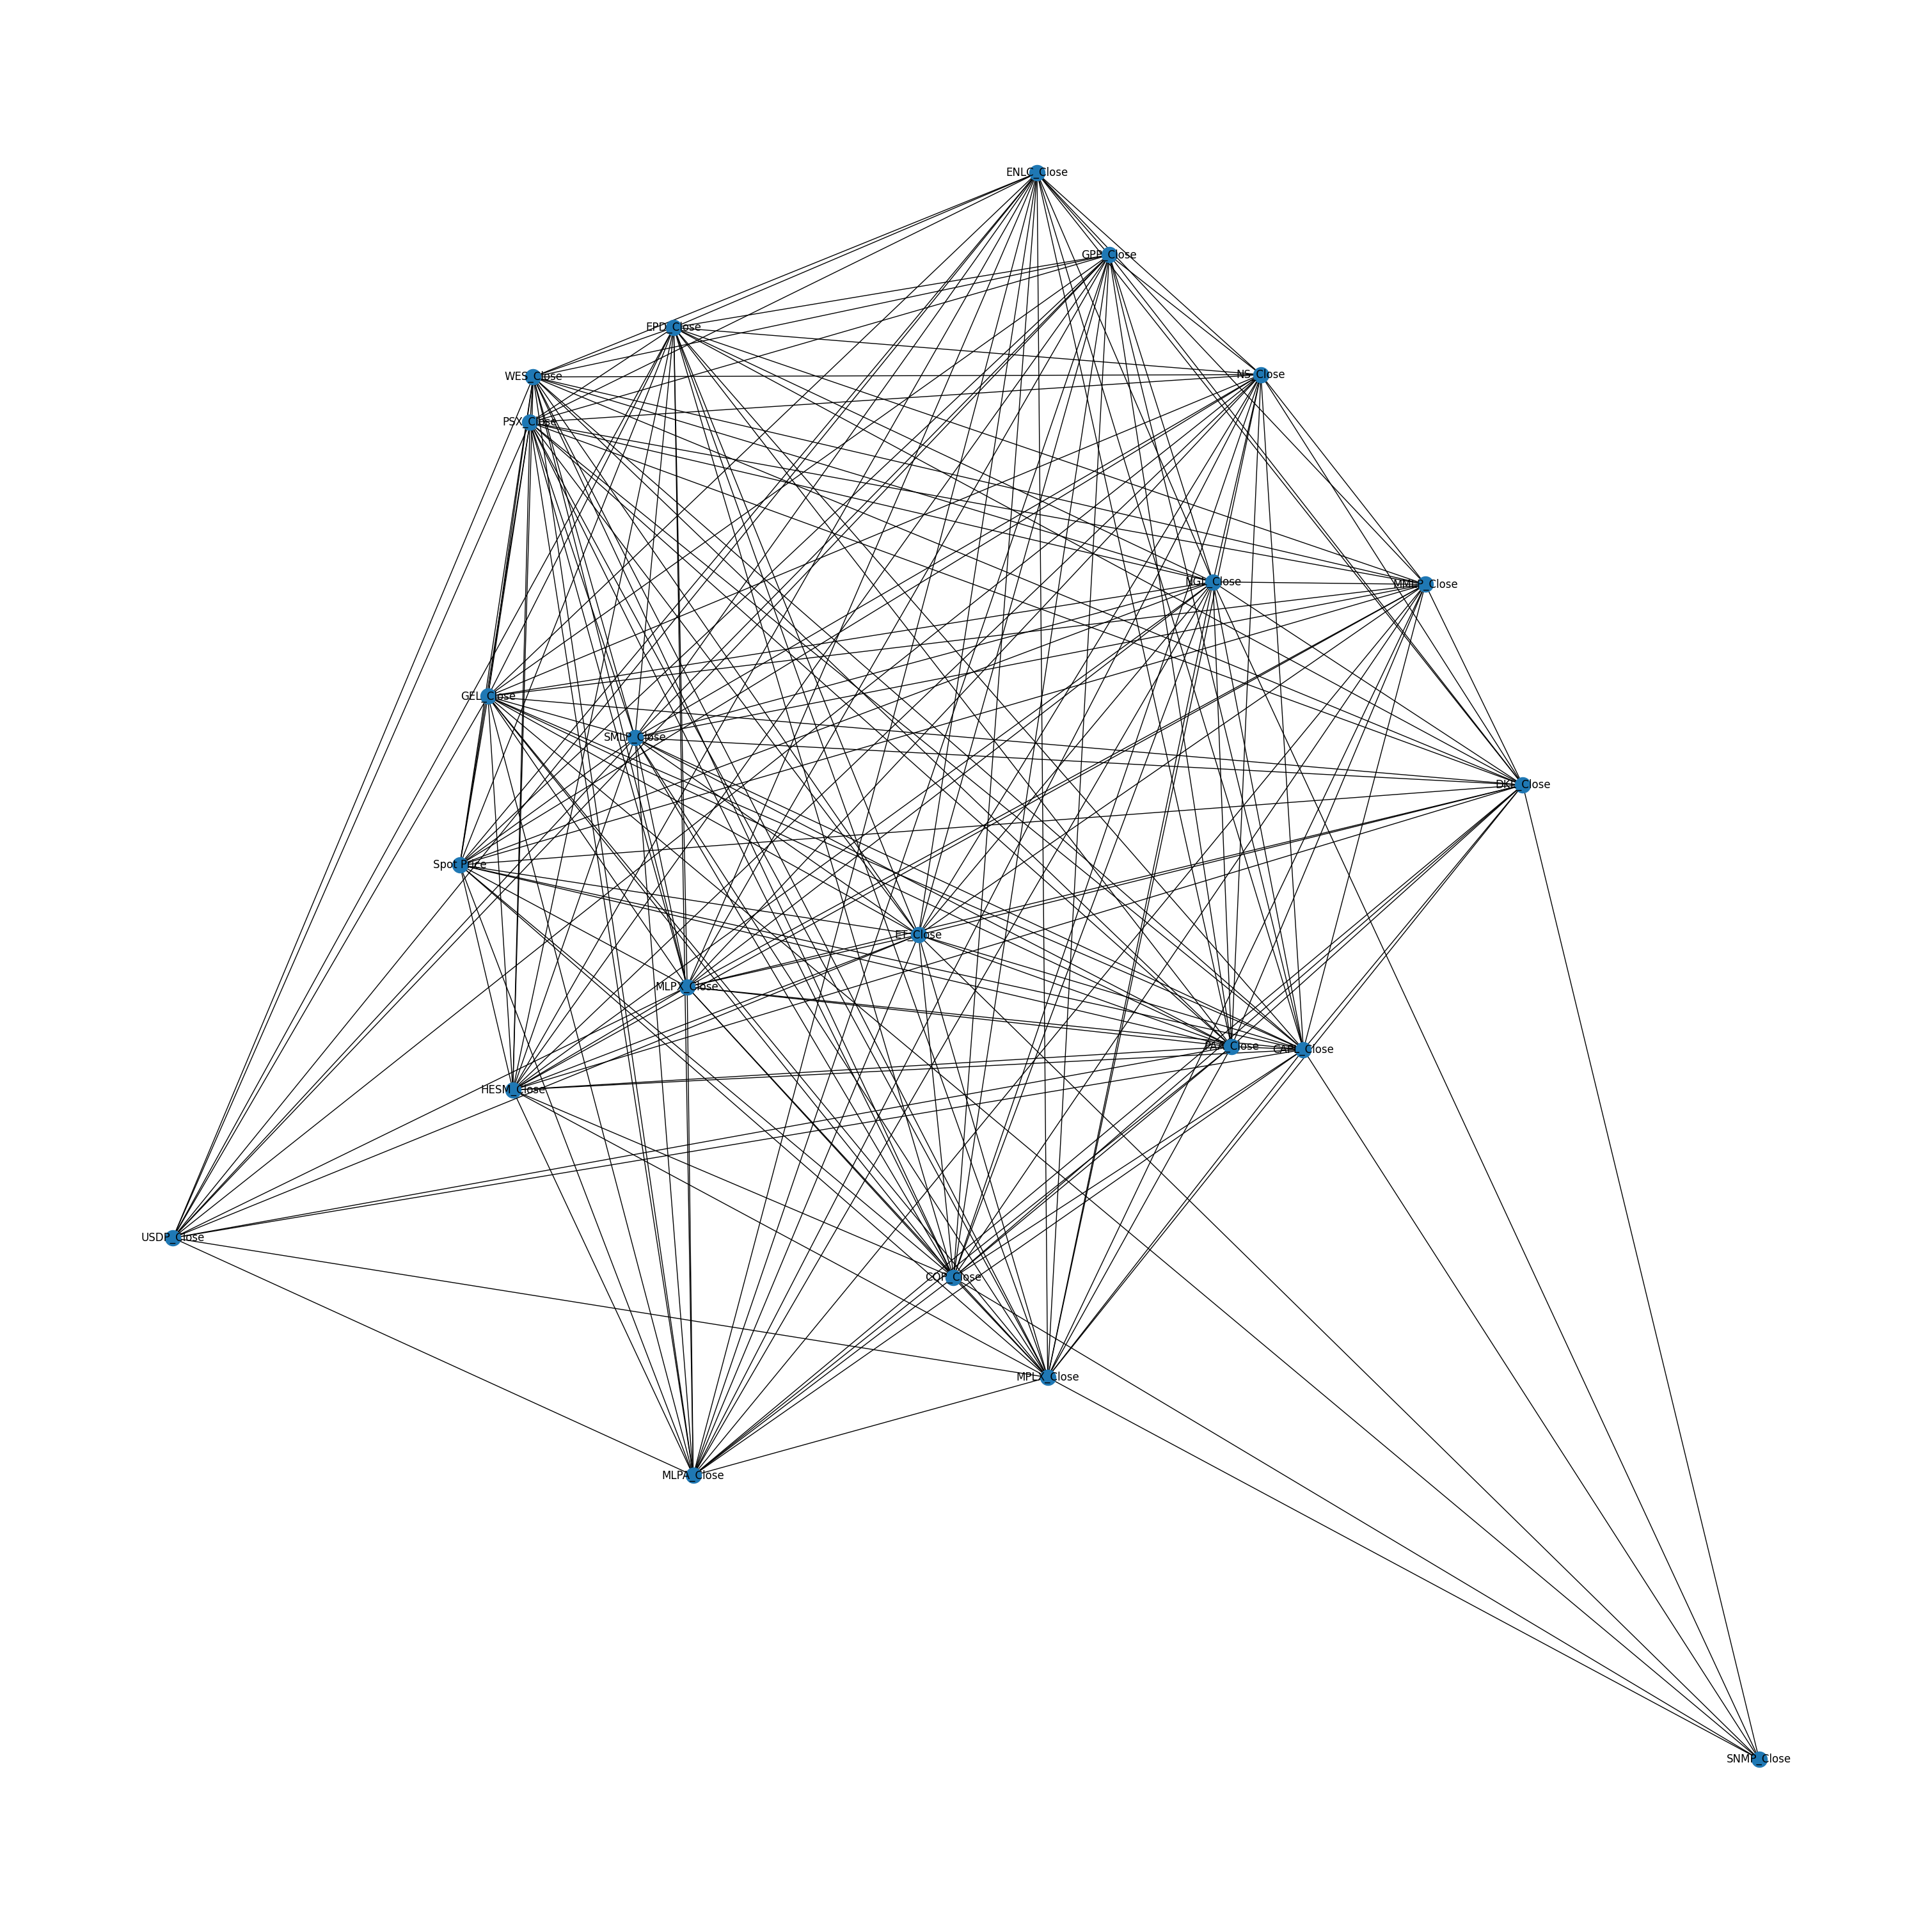

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

features = close_values.drop(columns=[f'{etf_ticker}_Next_Close'])

df = np.log1p(features.pct_change()).iloc[1:]


p = df.corr()
sns.heatmap(p)

cols = df.columns
p_df = pd.DataFrame(p, columns=cols, index=cols)
links = p_df.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
links = links.loc[(abs(links['value']) > 0.17) & (links['var1'] != links['var2'])]

G = nx.from_pandas_edgelist(links, 'var1', 'var2', create_using=nx.Graph())
pos = nx.spring_layout(G, k=0.2*1/np.sqrt(len(G.nodes())), iterations=20)
plt.figure(3, figsize=(30, 30))
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

nx.write_gexf(G, 'graph.gexf')


https://towardsdatascience.com/machine-learning-in-action-in-finance-using-graphical-lasso-to-identify-trading-pairs-in-fa00d29c71a7


https://towardsdatascience.com/porting-ideas-to-math-a-step-by-step-derivation-of-graphical-lasso-2e01f7165d95


In [29]:

pca_list = list()
features = close_values.drop(columns=[f'{etf_ticker}_Next_Close'])

pca_list = []
feature_weight_list = []

for n in range(1, 6):
    PCAmod = PCA(n_components=n)
    PCAmod.fit(features)
    pca_list.append(pd.Series({'n': n, 'model': PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n': n, 'features': features.columns,
                                             'values': abs_feature_values / abs_feature_values.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')

print(pca_df)


                 model       var
n                               
1  PCA(n_components=1)  0.765977
2  PCA(n_components=2)  0.900394
3  PCA(n_components=3)  0.948938
4  PCA(n_components=4)  0.974053
5  PCA(n_components=5)  0.983975


90% of total variation is explained by the first two components


In [40]:

train, test = train_test_split(close_values, test_size=0.8, random_state=42)

feature_columns = [col for col in all_stocks_data.columns if ('_Close' in col or 'Spot' in col) and etf_ticker not in col]
features = close_values.drop(columns=[f'{etf_ticker}_Next_Close'])

lr = LinearRegression()
X = close_values.drop(f'{etf_ticker}_Next_Close', axis=1)
y = close_values[f'{etf_ticker}_Next_Close']

X_train = train[feature_columns]
y_train = train[f'{etf_ticker}_Next_Close']

X_test  = test[feature_columns]
y_test  = test[f'{etf_ticker}_Next_Close']

pipe = [
    ('pca', PCA(n_components=n)),
    ('regression', lr)]

pipe = Pipeline(pipe)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
PCA_r2 = r2_score(y_pred, y_test)
PCA_r2
print(f'PCA regression: {PCA_r2}')

MSE: 1.4977464212088623
PCA regression: 0.9588331963131125


In [38]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]


ridgeCV = RidgeCV(alphas=alphas,
                  cv=4).fit(X_train, y_train)

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print("The best alpha is: {} with Root Mean Square Error: {}".format(
                                        ridgeCV.alpha_, ridgeCV_rmse))

lassoCV = LassoCV(alphas=None, cv=4, max_iter=10000)
lassoCV.fit(X_train, y_train)
LASSO_1_r2 = r2_score(y_test, lassoCV.predict(X_test))
print("R² Score for LassoCV model: ", LASSO_1_r2)

The best alpha is: 5.0 with Root Mean Square Error: 0.7108431700823182
R² Score for LassoCV model:  0.985866663650861


https://medium.com/the-quant-journey/pca-regression-on-etf-data-9d939c33fea9

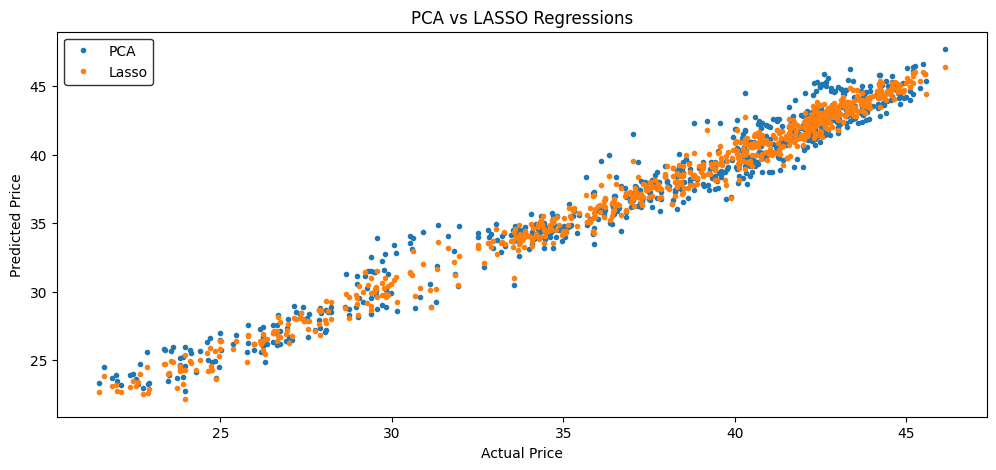

In [39]:
f = plt.figure(figsize=(12,5))
ax = plt.axes()

pipe = [
    ('pca', PCA(n_components=n)),
    ('regression', lr)
]
pipe = Pipeline(pipe)

labels = ['PCA', 'Lasso']

models = [pipe.fit(X_train, y_train), lassoCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test),
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       title='PCA vs LASSO Regressions');